# Covid-19 Analysis #

***
This notebook contains my analysis of the Covid-19 vaccination program.

# Dataset Overview #

fdhbdzbd

In [51]:
# Load the weekly vaccinations dataset

import pandas as pd

df = pd.read_csv('covid_weekly_vaccine.csv') # https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/explore?location=53.510274%2C-7.920586%2C7.88

# Let's have a look at the data
df.head()

,X,Y,ExtractDate,Week,TotalweeklyVaccines,Male,Female,NA,Moderna,Pfizer,...,FullyPer_Age10to19,FullyPer_Age20to29,FullyPer_Age30to39,FullyPer_Age40to49,FullyPer_Age50to59,FullyPer_Age60to69,FullyPer_Age70to79,FullyPer_80_,FullyPer_NA,ObjectId
0,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2020-W53,4076,1304,2772,0,10,4052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W01,44220,11846,32374,0,28,44148,...,0.000004,0.000018,0.000042,0.000011,0.000011,0.000010,0.000009,0.000049,NaN,2
2,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W02,53145,14057,39088,0,1946,51118,...,0.000004,0.000032,0.000079,0.000023,0.000020,0.000018,0.000014,0.000060,NaN,3
3,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W03,50222,14964,35258,0,51,50000,...,0.000004,0.000669,0.001511,0.001108,0.001237,0.000756,0.000086,0.000125,NaN,4
4,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W04,51949,15066,36883,0,35,51652,...,0.000007,0.007608,0.015900,0.015613,0.017585,0.011731,0.001500,0.004408,inf,5


In [52]:
# Convert the 'week' column to a proper date (first day of the ISO week)
df['Date'] = pd.to_datetime(df['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


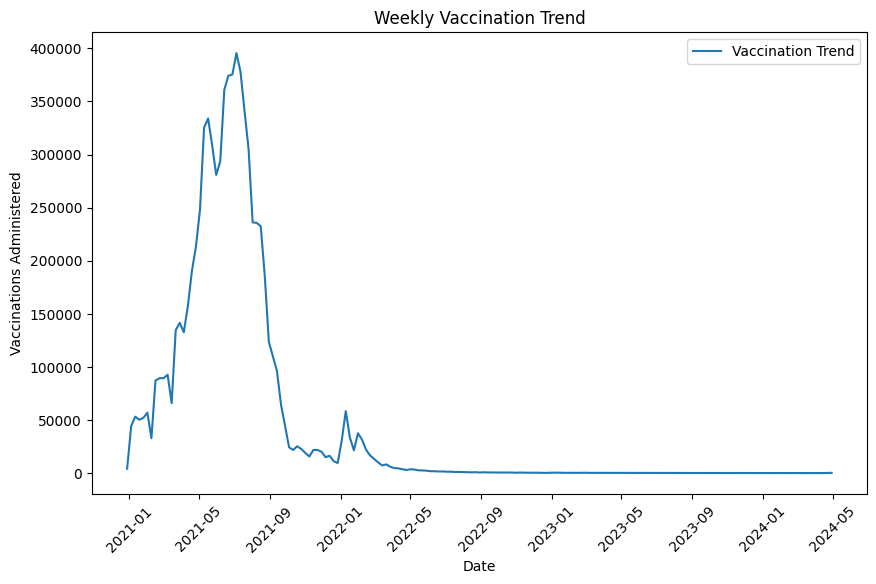

In [53]:
import matplotlib.pyplot as plt

# Assuming the vaccination count column is named 'Vaccination_Count' (replace if necessary)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['TotalweeklyVaccines'], label='Vaccination Trend')
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [54]:
import pandas as pd

# Convert the ISO week to the first day of that week (Monday)
end_date = pd.to_datetime('2022-W26-1', format='%G-W%V-%u')  # The first day of '2022-W26'

print(end_date)

2022-06-27 00:00:00


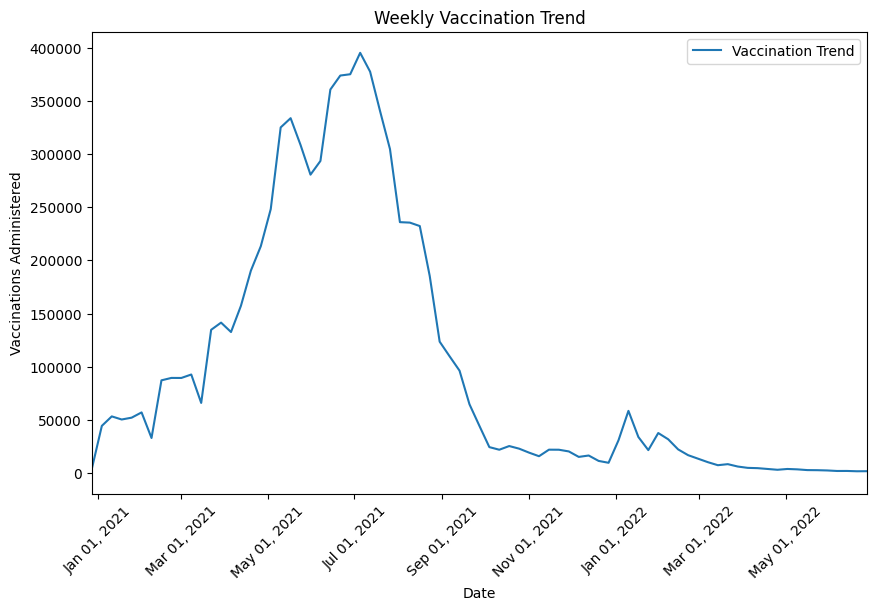

In [55]:
import matplotlib.pyplot as plt

# Plot vaccination trend
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['TotalweeklyVaccines'], label='Vaccination Trend')

# Set x-axis limits (start from the first date in the data to '2022-W26')
plt.xlim(df['Date'].min(), end_date)

# Format x-axis date labels and rotate them
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')

# Display legend
plt.legend()

# Show plot
plt.show()

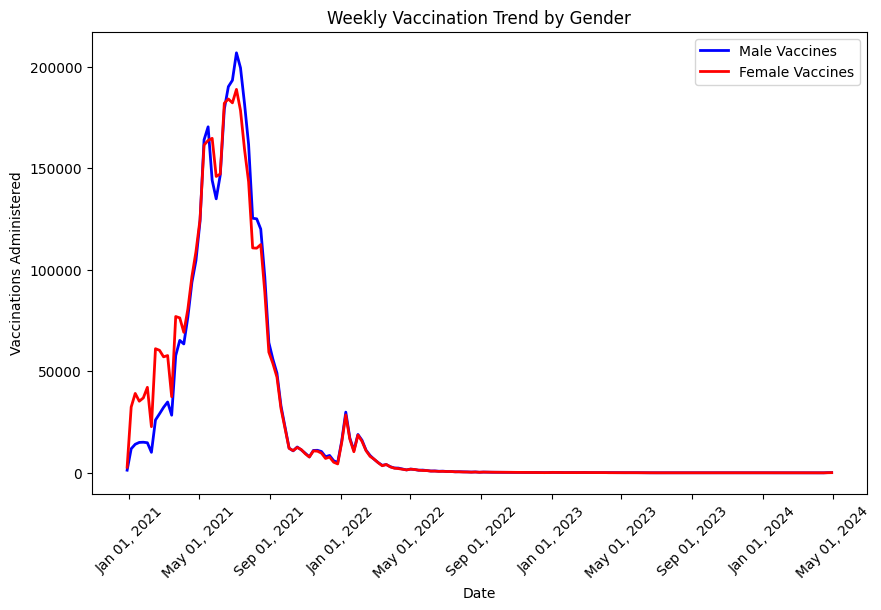

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure you have the correct column names for male and female vaccine counts
# Example column names: 'Male_Vaccines' and 'Female_Vaccines'

plt.figure(figsize=(10, 6))

# Plot male vaccination trend
plt.plot(df['Date'], df['Male'], label='Male Vaccines', color='blue', linestyle='-', linewidth=2)

# Plot female vaccination trend
plt.plot(df['Date'], df['Female'], label='Female Vaccines', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Gender')

# Show legend
plt.legend()

# Display the plot
plt.show()

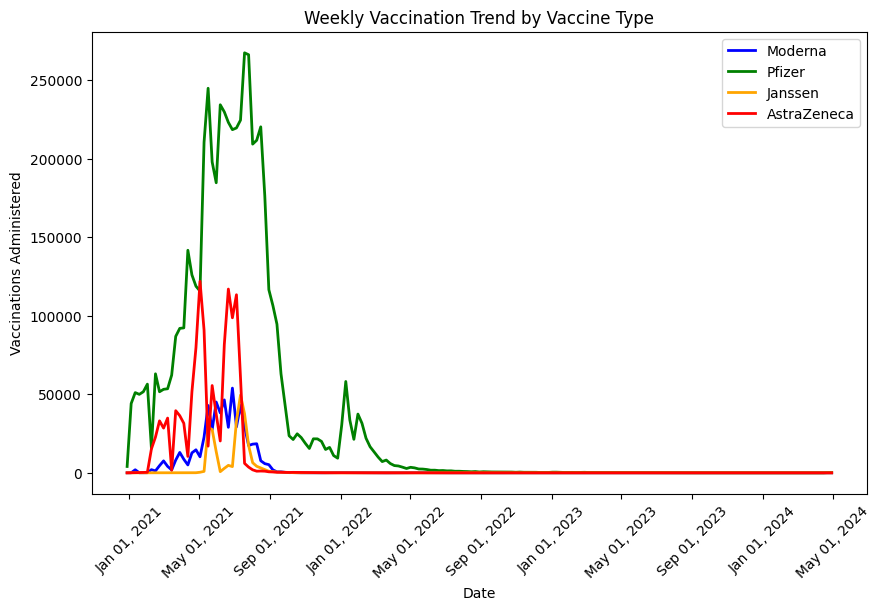

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the vaccination trend for different vaccine types
plt.figure(figsize=(10, 6))

# Plot Moderna vaccinations
plt.plot(df['Date'], df['Moderna'], label='Moderna', color='blue', linestyle='-', linewidth=2)

# Plot Pfizer vaccinations
plt.plot(df['Date'], df['Pfizer'], label='Pfizer', color='green', linestyle='-', linewidth=2)

# Plot Janssen vaccinations
plt.plot(df['Date'], df['Janssen'], label='Janssen', color='orange', linestyle='-', linewidth=2)

# Plot AstraZeneca vaccinations
plt.plot(df['Date'], df['AstraZeneca'], label='AstraZeneca', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Vaccine Type')

# Show legend
plt.legend()

# Display the plot
plt.show()

Partial_Age0to9       79207.0
Partial_Age10to19    362340.0
Partial_Age20to29    558006.0
Partial_Age30to39    596225.0
Partial_Age40to49    710341.0
Partial_Age50to59    636535.0
Partial_Age60to69    522056.0
Partial_Age70to79    395630.0
Partial_Age80_       251295.0
dtype: float64


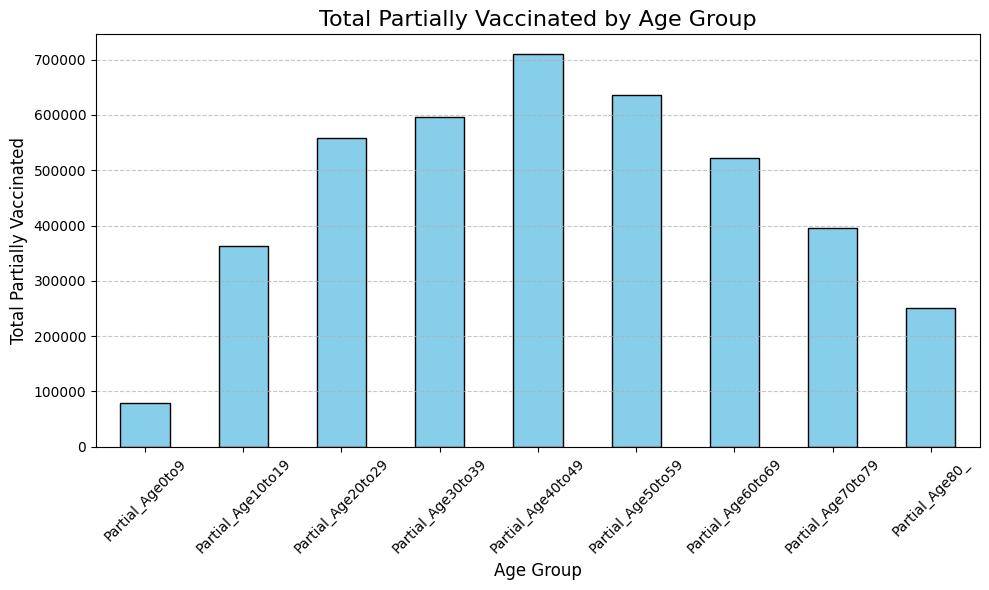

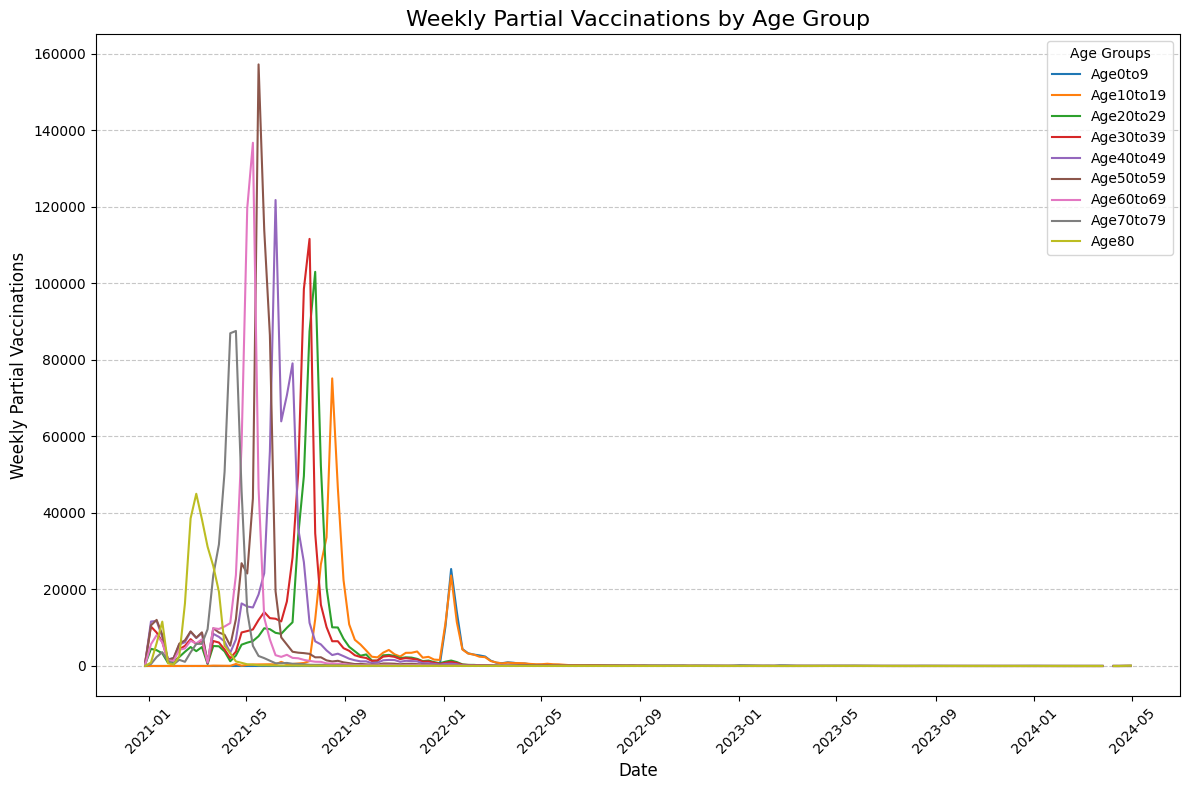

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the partial vaccination columns
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

# 1. Total partial vaccinations by age group
total_partial_vaccinated_by_age = df[partial_vaccinated_columns].sum()

print(total_partial_vaccinated_by_age)

# Plot total partial vaccinations by age group (Bar Chart)
plt.figure(figsize=(10, 6))
total_partial_vaccinated_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Partially Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Partially Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Trends over time for partial vaccinations by age group (Line Chart)
plt.figure(figsize=(12, 8))
for column in partial_vaccinated_columns:  # <- Add missing colon here
    plt.plot(df['Date'], df[column], label=column.split('_')[1])

plt.title('Weekly Partial Vaccinations by Age Group', fontsize=16)  # Corrected title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Partial Vaccinations', fontsize=12)  # Corrected ylabel
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Fully_Age0to9       73458.0
Fully_Age10to19    353212.0
Fully_Age20to29    549699.0
Fully_Age30to39    589031.0
Fully_Age40to49    704571.0
Fully_Age50to59    633728.0
Fully_Age60to69    519551.0
Fully_Age70to79    393663.0
Fully_Age80_       248658.0
dtype: float64


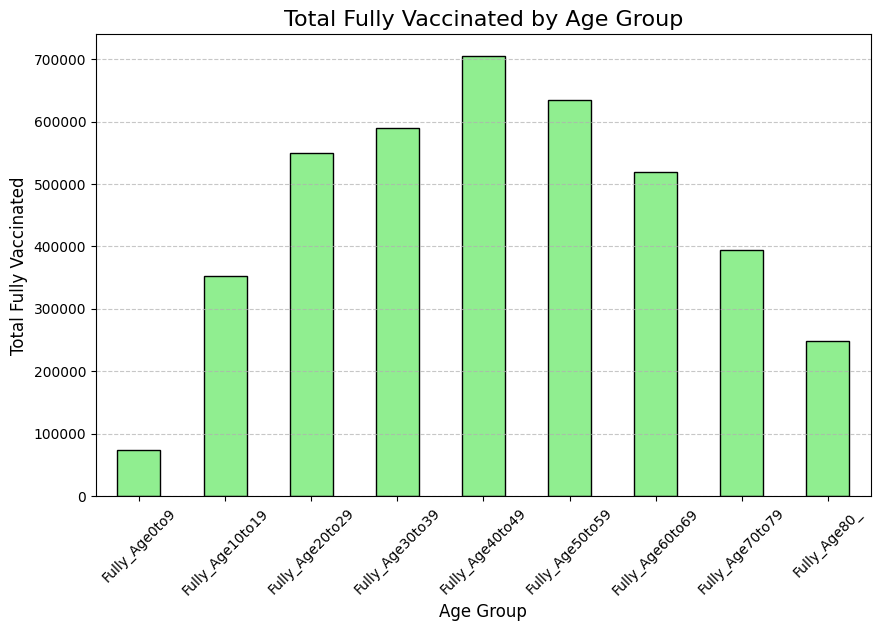

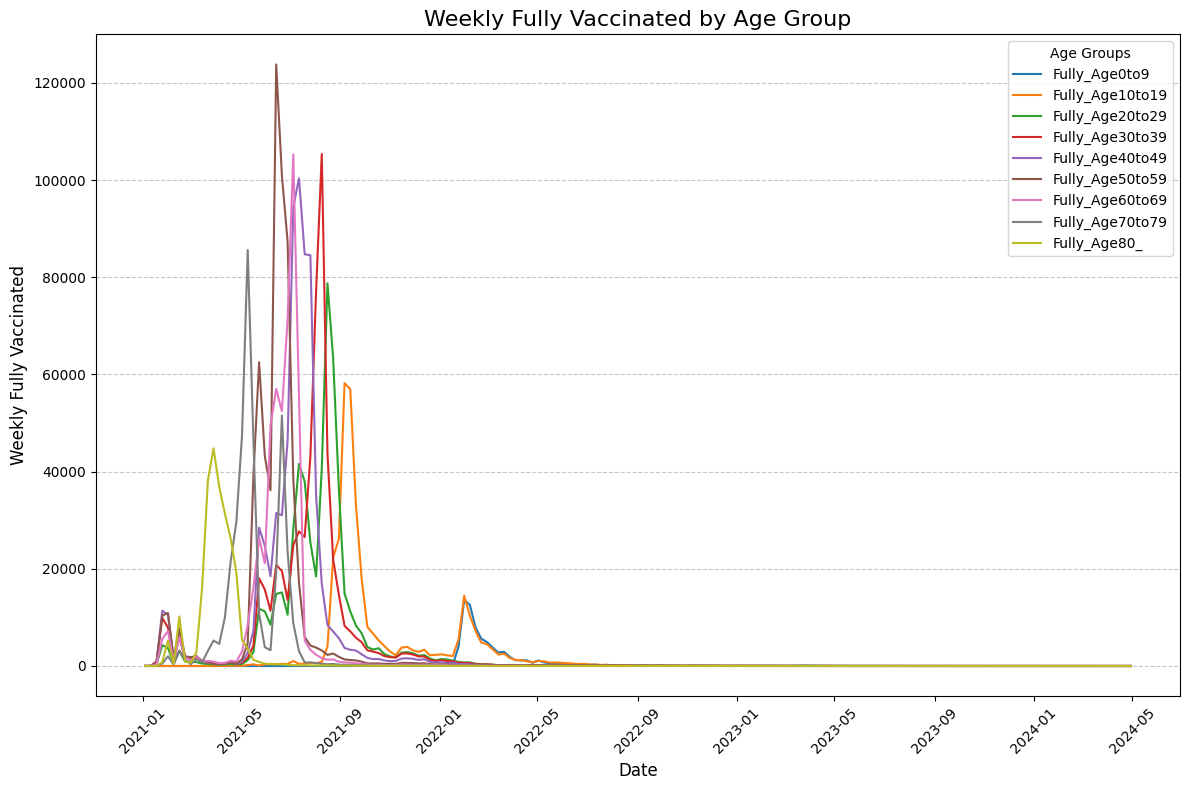

In [66]:
import matplotlib.pyplot as plt

# Extract columns related to fully vaccinated age groups
fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# 1. Total fully vaccinated by age group
total_fully_vaccinated_by_age = df[fully_vaccinated_columns].sum()

print(total_fully_vaccinated_by_age)

# Plot total fully vaccinated by age group
plt.figure(figsize=(10, 6))
total_fully_vaccinated_by_age.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Fully Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Trends over time for fully vaccinated age groups
plt.figure(figsize=(12, 8))
for column in fully_vaccinated_columns:
    plt.plot(df['Date'], df[column], label=column)

plt.title('Weekly Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Fully Vaccinated', fontsize=12)
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

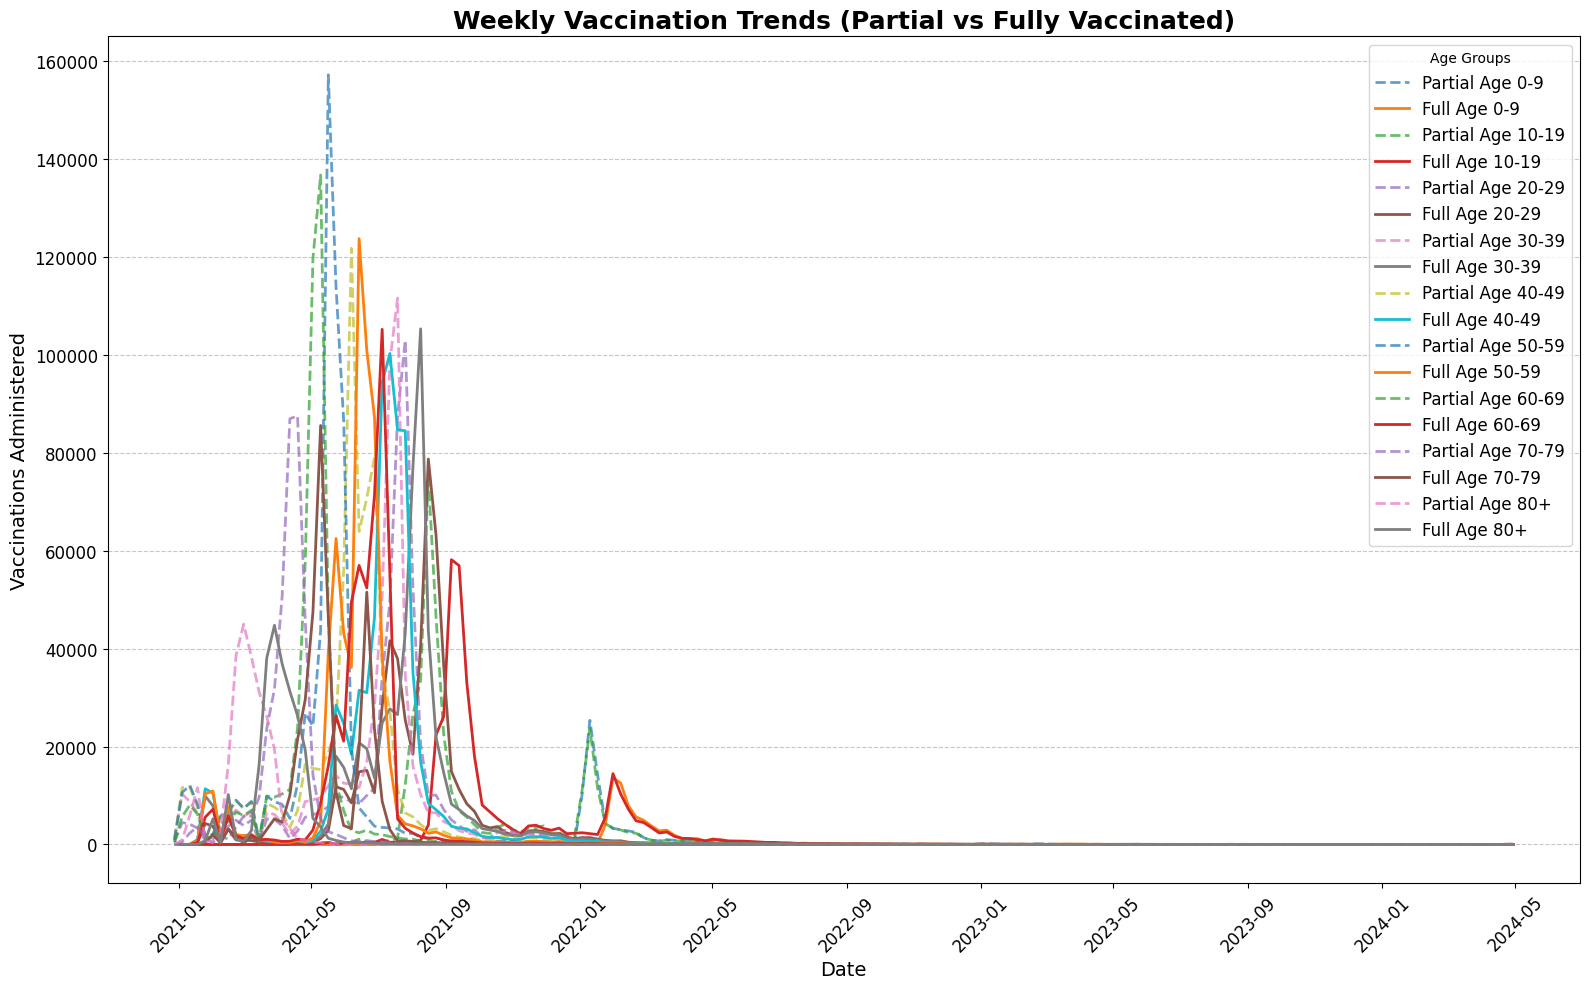

In [60]:
import matplotlib.pyplot as plt

# Define columns for partial and full vaccinations
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# Plot for each column manually for all age groups
plt.figure(figsize=(16, 10))  # Increase figure size for better clarity

# Set line styles and make the lines thicker for better visibility
line_style_partial = {'linestyle': '--', 'alpha': 0.7, 'linewidth': 2}
line_style_full = {'linewidth': 2}

plt.plot(df['Date'], df[partial_vaccinated_columns[0]], label="Partial Age 0-9", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[0]], label="Full Age 0-9", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[1]], label="Partial Age 10-19", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[1]], label="Full Age 10-19", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[2]], label="Partial Age 20-29", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[2]], label="Full Age 20-29", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[3]], label="Partial Age 30-39", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[3]], label="Full Age 30-39", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[4]], label="Partial Age 40-49", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[4]], label="Full Age 40-49", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[5]], label="Partial Age 50-59", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[5]], label="Full Age 50-59", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[6]], label="Partial Age 60-69", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[6]], label="Full Age 60-69", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[7]], label="Partial Age 70-79", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[7]], label="Full Age 70-79", **line_style_full)

plt.plot(df['Date'], df[partial_vaccinated_columns[8]], label="Partial Age 80+", **line_style_partial)
plt.plot(df['Date'], df[fully_vaccinated_columns[8]], label="Full Age 80+", **line_style_full)

# Customize the plot appearance
plt.title("Weekly Vaccination Trends (Partial vs Fully Vaccinated)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Vaccinations Administered", fontsize=14)
plt.legend(title="Age Groups", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

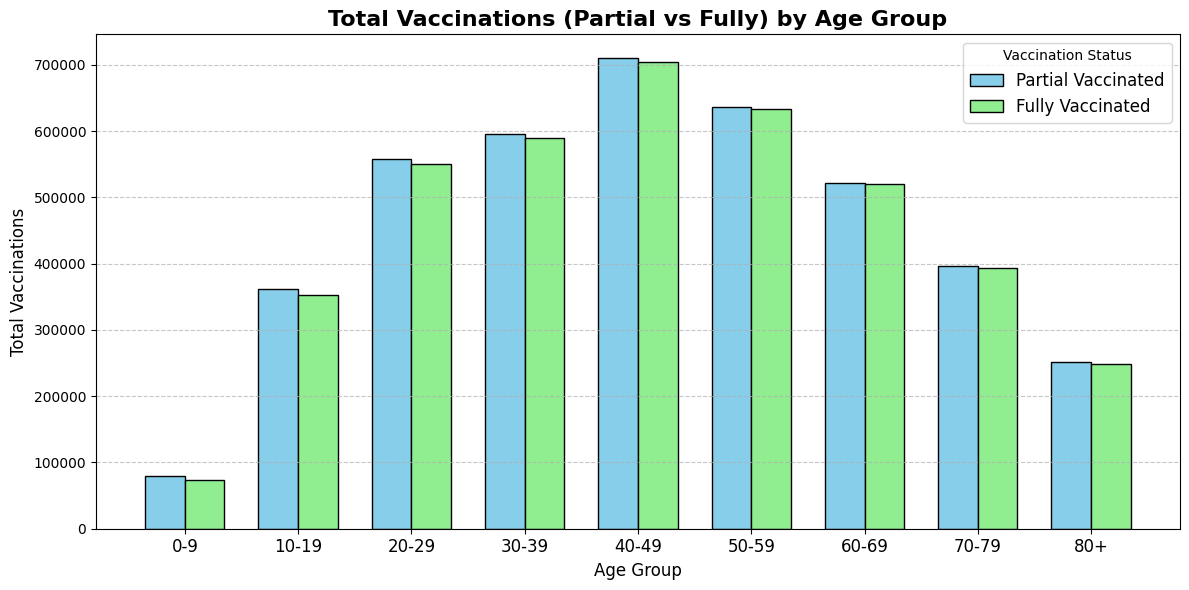

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
# Assuming `total_partial_vaccinated_by_age` and `total_fully_vaccinated_by_age` are pandas Series

age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  # Replace with actual age groups

# Replace with your actual total partial and fully vaccinated data
total_partial_vaccinated_by_age = [79207.0, 362340.0, 558006.0, 596225.0, 710341.0, 636535.0, 522056.0, 395630.0, 251295.0]
total_fully_vaccinated_by_age = [73458.0, 353212.0, 549699.0, 589031.0, 704571.0, 633728.0, 519551.0, 393663.0, 248658.0]

# Create the positions for each bar
bar_width = 0.35
index = np.arange(len(age_groups))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the partial vaccination bars (shifted to the left by half the bar width)
plt.bar(index - bar_width / 2, total_partial_vaccinated_by_age, bar_width, label='Partial Vaccinated', color='skyblue', edgecolor='black')

# Plot the fully vaccinated bars (shifted to the right by half the bar width)
plt.bar(index + bar_width / 2, total_fully_vaccinated_by_age, bar_width, label='Fully Vaccinated', color='lightgreen', edgecolor='black')

# Add title and labels
plt.title('Total Vaccinations (Partial vs Fully) by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)
plt.xticks(index, age_groups, fontsize=12)
plt.legend(title="Vaccination Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()